In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import math 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFE, SelectFromModel 
from sklearn.svm import LinearSVR


In [4]:
data = pd.read_csv("/home/moni/DataSet/boston house price/housing.csv", delim_whitespace=True, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.dtypes

0     float64
1     float64
2     float64
3       int64
4     float64
5     float64
6     float64
7     float64
8       int64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

In [4]:
data.describe(include='all') 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

# Dividing Dataset 

In [6]:
X = data.iloc[:, :13]
Y = data.iloc[:, 13]

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [9]:
def fit_model(X, Y): 
    model = LinearRegression()
    model.fit(X, Y)
    
    return model 

In [10]:
def calculate_metrics(model, X_test_scaled, Y_test): 
    y_predict_r = model.predict(X_test_scaled)
    
    # calculating error 
    MSE = mean_squared_error(Y_test, y_predict_r)
    MAE = mean_absolute_error(Y_test, y_predict_r)
    RMSE = math.sqrt(mean_squared_error(Y_test, y_predict_r))
    R2 = r2_score(Y_test, y_predict_r)
    #RMSLE = math.sqrt(mean_squared_log_error(Y_test, y_predict_r))
    MAPE = math.sqrt(mean_absolute_percentage_error(Y_test, y_predict_r))
    
    return MSE, MAE, RMSE, R2, MAPE

In [11]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
    
    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)
    
    # Make predictions on test dataset and calculate metrics.
    MSE, MAE, RMSE, R2, MAPE = calculate_metrics(model, X_test_scaled, Y_test)
    
    return MSE, MAE, RMSE, R2, MAPE

In [12]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    MSE, MAE, RMSE, R2, MAPE = train_and_get_metrics(X, Y)
    
    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[MSE, MAE, RMSE, R2, MAPE, X.shape[1]]], columns=["MSE", "MAE", "RMSE", "R2", "MAPE", 'Feature Count'])
    
    return display_df 


In [13]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13


# Correlation Matrix

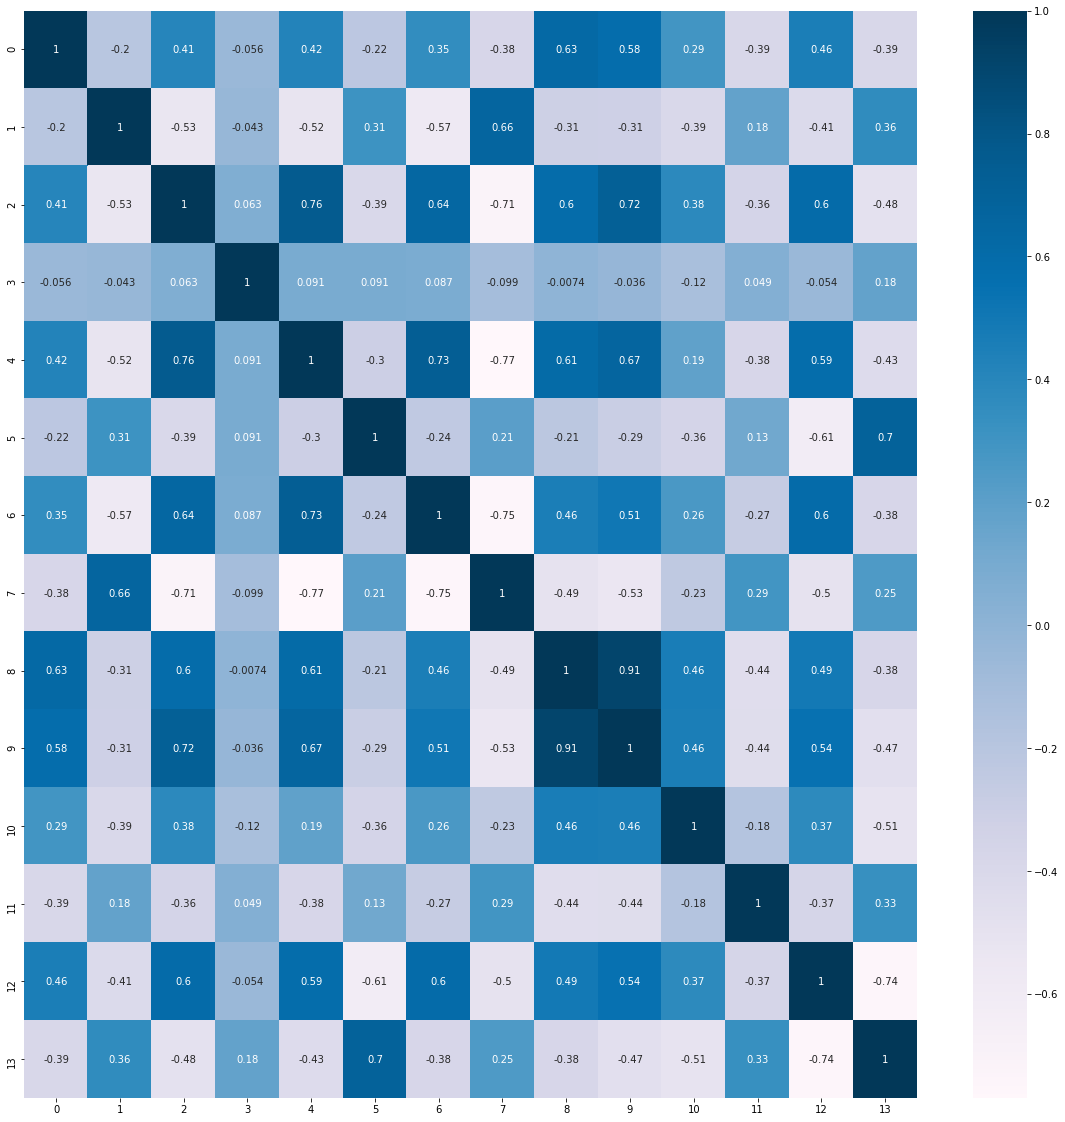

In [14]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = data.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

# Correlation with the target variable

In [15]:
# Get the absolute value of the correlation
cor_target = abs(cor.iloc[:, 13])

# Select highly correlated features (thresold = 0.3)
relevant_features = cor_target[cor_target>0.3]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove(13)

# Display the results
print(names)

[0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12]


In [16]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(data[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13
Strong features,28.244738,3.781663,5.314578,0.700465,0.436408,11


# Correlation with other features

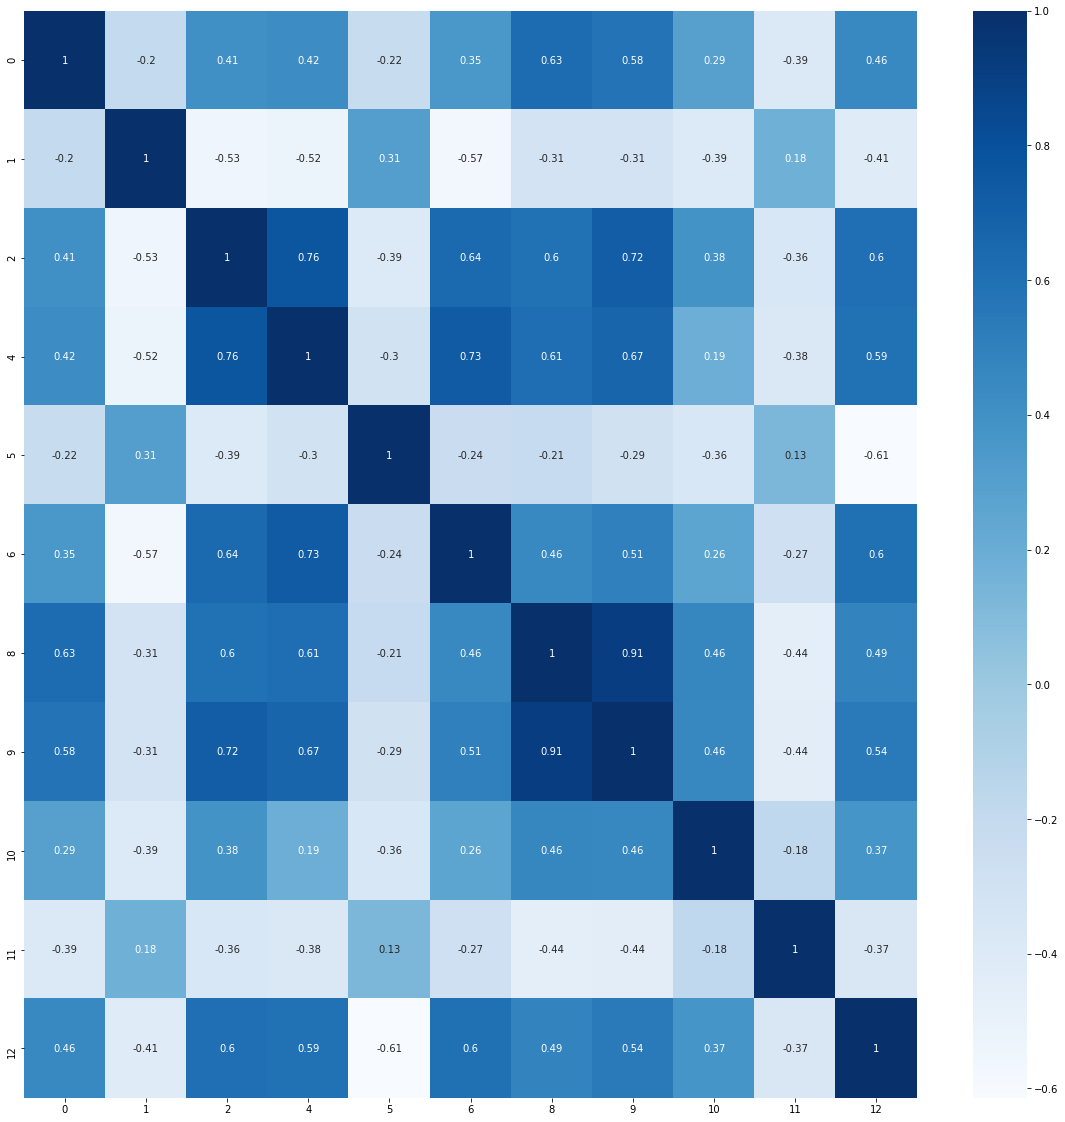

In [17]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
new_corr = data[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [18]:
# Get the absolute value of the correlation
cor_target = abs(cor.iloc[:, 13])

# Select highly correlated features (thresold = 0.4)
relevant_features = cor_target[cor_target>0.4]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove(13)

# Display the results
print(names)

[2, 4, 5, 9, 10, 12]


In [19]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(data[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13
Strong features,28.244738,3.781663,5.314578,0.700465,0.436408,11
Strong features,46.386814,4.332690,6.810787,0.624345,0.439944,6


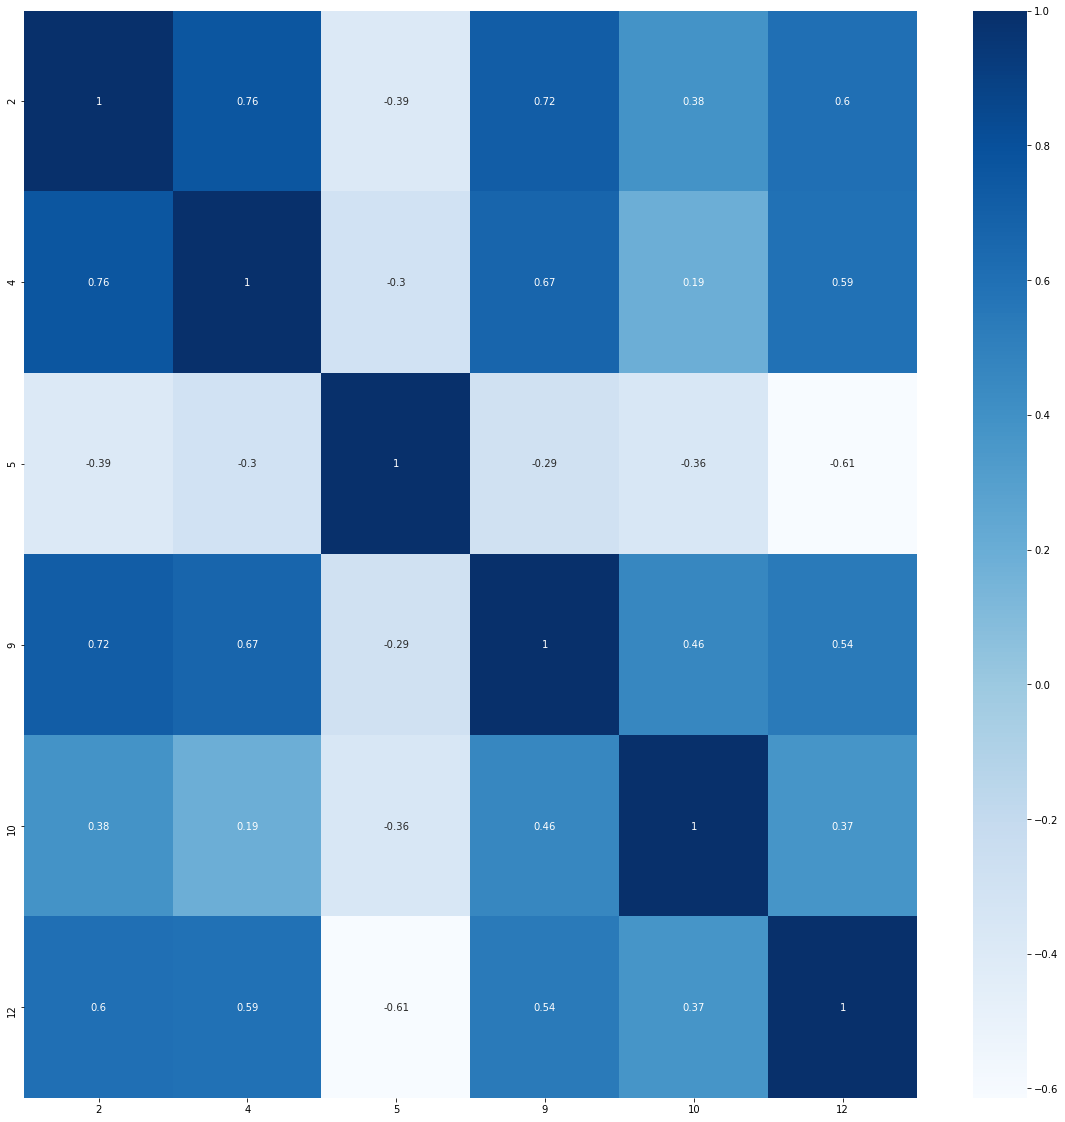

In [20]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
new_corr = data[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [21]:
# Get the absolute value of the correlation
cor_target = abs(cor.iloc[:, 13])

# Select highly correlated features (thresold = 0.5)
relevant_features = cor_target[cor_target>0.5]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove(13)

# Display the results
print(names)

[5, 10, 12]


In [22]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(data[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13
Strong features,28.244738,3.781663,5.314578,0.700465,0.436408,11
Strong features,46.386814,4.332690,6.810787,0.624345,0.439944,6
Strong features,24.596524,3.719775,4.959488,0.726231,0.444429,3


# Univariate Selection with Sci-Kit Learn

In [31]:
def univariate_selection():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_regression, k=6)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(data.drop(13, 1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = data.drop(13, 1 ).columns[feature_idx]
    
    return feature_names

In [32]:
univariate_feature_names = univariate_selection()

0: False
1: False
2: True
3: False
4: True
5: True
6: False
7: False
8: False
9: True
10: True
11: False
12: True


In [33]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(data[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13
Strong features,28.244738,3.781663,5.314578,0.700465,0.436408,11
Strong features,46.386814,4.332690,6.810787,0.624345,0.439944,6
Strong features,24.596524,3.719775,4.959488,0.726231,0.444429,3
F-test,40.256948,3.823327,6.344836,0.585675,0.414425,6


# Wrapper Methods

### Recursive Feature Elimination

In [37]:
def run_rfe():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = RandomForestRegressor(random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(model, 7)
    
    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = data.drop(13, 1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()
rfe_feature_names

/home/moni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Int64Index([0, 4, 5, 7, 9, 10, 12], dtype='int64')

In [39]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(data[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = results.append(rfe_eval_df)
results.head(n=10)

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13
Strong features,28.244738,3.781663,5.314578,0.700465,0.436408,11
Strong features,46.386814,4.332690,6.810787,0.624345,0.439944,6
Strong features,24.596524,3.719775,4.959488,0.726231,0.444429,3
F-test,40.256948,3.823327,6.344836,0.585675,0.414425,6
RFE,23.639822,3.416720,4.862080,0.726660,0.415576,7


# Embedded Methods

### Feature Importances

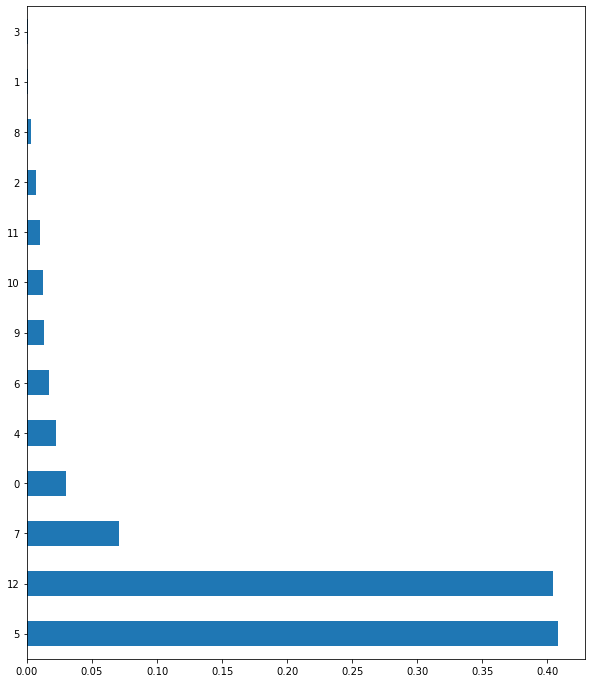

Int64Index([0, 4, 5, 6, 7, 9, 12], dtype='int64')

In [44]:
def feature_importances_from_tree_based_model_():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    # Define the model to use
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestRegressor()
    model = model.fit(X_train_scaled,Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = data.drop(13, 1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)
feature_imp_feature_names

In [45]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(data[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = results.append(feat_imp_eval_df)
results.head(n=10)

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13
Strong features,28.244738,3.781663,5.314578,0.700465,0.436408,11
Strong features,46.386814,4.332690,6.810787,0.624345,0.439944,6
Strong features,24.596524,3.719775,4.959488,0.726231,0.444429,3
F-test,40.256948,3.823327,6.344836,0.585675,0.414425,6
RFE,23.639822,3.416720,4.862080,0.726660,0.415576,7
Feature Importance,25.850496,3.681476,5.084338,0.643261,0.447116,7


# LinearSVR

In [51]:
def run_l1_regularization():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVR(random_state=0, tol=1e-5))
    selection.fit(X_train_scaled, Y_train)

    feature_names = data.drop(13, 1).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()
l1reg_feature_names

/home/moni/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Int64Index([5, 7, 9, 10, 12], dtype='int64')

In [53]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(data[l1reg_feature_names], Y)
l1reg_eval_df.index = ['linear SVR'] 

# Append to results and display
results = results.append(l1reg_eval_df)
results.head(n=10)

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,27.160585,3.522141,5.211582,0.704735,0.430502,13
Strong features,28.244738,3.781663,5.314578,0.700465,0.436408,11
Strong features,46.386814,4.332690,6.810787,0.624345,0.439944,6
Strong features,24.596524,3.719775,4.959488,0.726231,0.444429,3
F-test,40.256948,3.823327,6.344836,0.585675,0.414425,6
RFE,23.639822,3.416720,4.862080,0.726660,0.415576,7
Feature Importance,25.850496,3.681476,5.084338,0.643261,0.447116,7
linear SVR,18.215602,3.249480,4.267974,0.744078,0.404056,5


# Saving selected Features

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data_f = data.iloc[:, [5, 7, 9, 10, 12, 13]]
data_f = data_f.rename(columns = {5: "a", 7:"b", 9:"c", 10:"d", 12:"e", 13:"f"}, inplace=False) 
data_f.head()

,a,b,c,d,e,f
0,6.575,4.0900,296.0,15.3,4.98,24.0
1,6.421,4.9671,242.0,17.8,9.14,21.6
2,7.185,4.9671,242.0,17.8,4.03,34.7
3,6.998,6.0622,222.0,18.7,2.94,33.4
4,7.147,6.0622,222.0,18.7,5.33,36.2


In [7]:
data_f.to_csv("/home/moni/DataSet/boston house price/selected_feature.csv", index=False) 